purpose: generate bar plot of the network overlap relative to controls

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import os
from rca_functions import *

In [3]:
#os.chdir()
os.getcwd()

'/tscc/projects/ps-palmer/brittany/rare_common_alcohol/notebooks'

In [5]:
coloc_scores=pd.read_csv('colocalization_scores/colocalization_scores_pcnet14.tsv',sep='\t')


FileNotFoundError: [Errno 2] No such file or directory: 'colocalization_scores/colocalization_scores_pcnet14.tsv'

In [95]:
coloc_scores['lower error'] = coloc_scores.apply(lambda x: x['observed/expected network size'] - 
                                                x['size observed overlap']/(x['size expected overlap'] 
                                                                    + 1.96*
                                                                    x['expected overlap error (stdev)']), axis = 1)
coloc_scores['upper error'] = coloc_scores.apply(lambda x: x['size observed overlap']/
                                                (x['size expected overlap'] - 1.96*x['expected overlap error (stdev)']) 
                                                - x['observed/expected network size'], axis = 1)



In [172]:
coloc_scores=pd.read_csv('colocalization_scores/coloc_rare_common_comb_pcnet_v20_annotated.tsv',sep='\t')

In [173]:
coloc_scores['yerr_lower'] = coloc_scores.apply(lambda x: x.obs_exp - x.observed_overlap/(x.expected_overlap_mean + 1.96*x.expected_overlap_std), axis = 1)
coloc_scores['yerr_upper'] = coloc_scores.apply(lambda x: x.observed_overlap/(x.expected_overlap_mean - 1.96*x.expected_overlap_std) - x.obs_exp, axis = 1)

In [174]:
coloc_scores=coloc_scores[(coloc_scores['z_comb']==3)
&(coloc_scores['z_12']==1.5)
&(coloc_scores['include']=='include')]
#&(~coloc_scores['include_small'].isna())]

In [121]:
#tbl=coloc_scores.sort_values(by='include_small', ascending=True)
tbl=coloc_scores[~(coloc_scores[' filename'].str.contains('GSCAN'))&~(coloc_scores[' filename'].str.contains('ukbb'))]
tbl=tbl.sort_values(by='obs_exp', ascending=False)

#tbl=coloc_scores[coloc_scores['corrected_pval']<0.05].sort_values(by='obs_exp', ascending=False)

In [168]:
tbl.color

14    #3636ebya
0     #3636ebya
24    #3636ebya
5     #3636ebya
3       #CCCCCC
8       #CCCCCC
6       #CCCCCC
12      #CCCCCC
11    #3636ebya
13      #CCCCCC
16      #CCCCCC
4       #CCCCCC
2       #CCCCCC
1       #CCCCCC
15      #CCCCCC
19      #CCCCCC
29    #3636ebya
17      #CCCCCC
20      #CCCCCC
18      #CCCCCC
21      #CCCCCC
10      #CCCCCC
9       #CCCCCC
23      #CCCCCC
26      #CCCCCC
22      #CCCCCC
27      #CCCCCC
25      #CCCCCC
28      #CCCCCC
7       #CCCCCC
Name: color, dtype: object

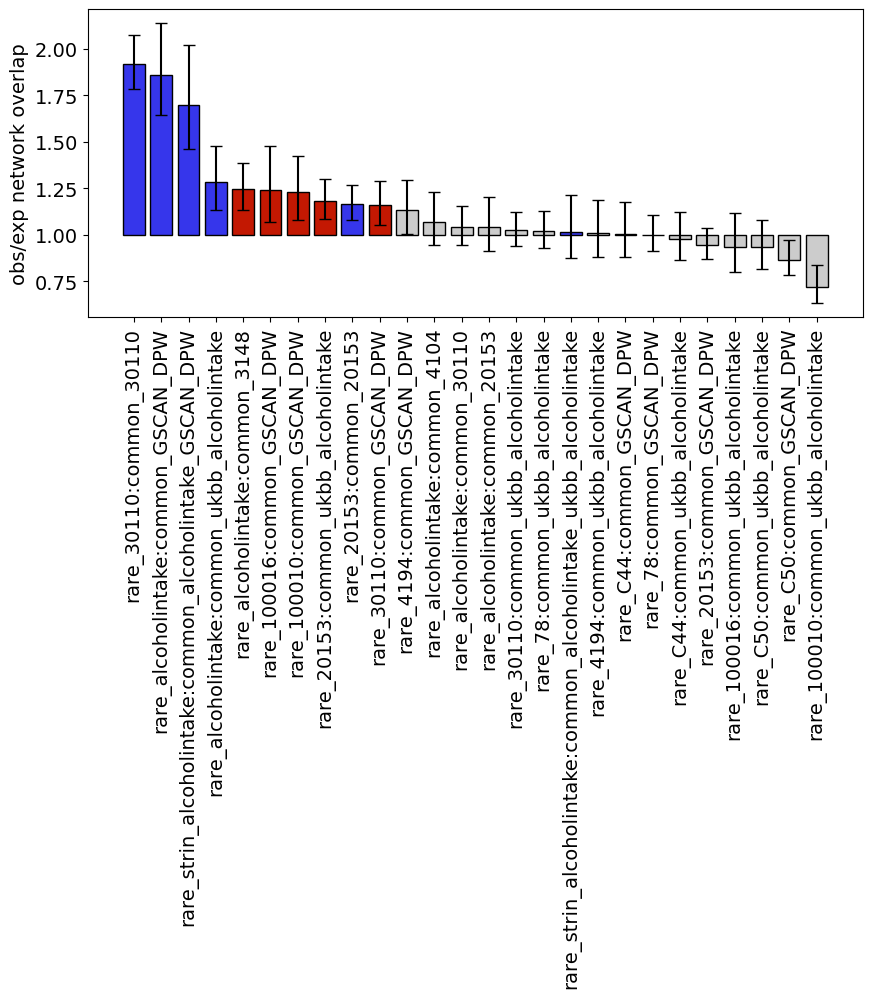

In [176]:
tbl=coloc_scores.sort_values(by='obs_exp', ascending=False)
#tbl=coloc_scores
plt.figure(figsize=(10,4))
plt.bar(x = tbl.label,
       bottom= 1, height = tbl.obs_exp-1, capsize=4, edgecolor="black",
        yerr = [tbl.yerr_lower, tbl.yerr_upper],
        color =tbl.color)
plt.xticks(rotation = 90)
plt.ylabel('obs/exp network overlap')
plt.savefig('figures/barplot_'+'pcnet20'+'negative_ctrls_extended.svg',bbox_inches='tight')


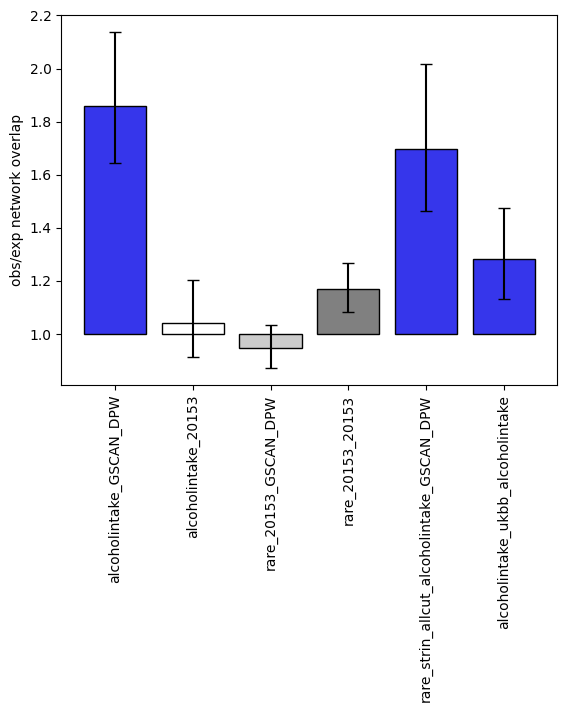

In [68]:
#tbl=coloc_scores.sort_values(by='obs_exp', ascending=False)
color3="#3636eb"
grey='#CCCCCC'
plt.bar(x = tbl.label,
       bottom= 1, height = tbl.obs_exp-1, capsize=4, edgecolor="black",
        yerr = [tbl.yerr_lower, tbl.yerr_upper],
        color =[color3]+['white',grey,'grey']+[color3,color3]  )
plt.xticks(rotation = 90)
plt.ylabel('obs/exp network overlap')
#plt.savefig('figures/barplot_'+rare[i]+'_'+s2g[j]+'_andAnnovar'+'_small.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/barplot_'+'pcnet20'+'_small.svg',bbox_inches='tight')
#plt.savefig('figures/barplot_'+'supplement'+s2g[j]+'_small.svg',bbox_inches='tight')

In [26]:
coloc_scores.observed_overlap/(coloc_scores.expected_overlap_mean-coloc_scores.expected_overlap_std)

0     1.500518
1     0.995028
2     1.132660
3     0.953145
4     1.057761
5     1.156816
6     1.148594
7     0.999879
8     1.239911
9     1.281787
10    1.162320
11    1.176844
12    1.205598
13    0.909314
14    1.541981
dtype: float64

In [42]:
tbl=coloc_scores[coloc_scores.label.isin(['alc rare| alc common','alc strin rare| alc common','alc rare| ctrl 20153','ctrl 20153 rare| alc common','ctrl 20153 rare| ctrl 20153','alc rare| ukbb alc common'])]

In [14]:
tbl2=coloc_scores[coloc_scores.label.isin(['alc rare| alc common','neale_20153_irnt','neale_4104_irnt'])]

In [76]:
tbl=coloc_scores
tbl=tbl.sort_values('include_small',ascending=True)

In [29]:
plt.rcParams.update({'font.size': 14})

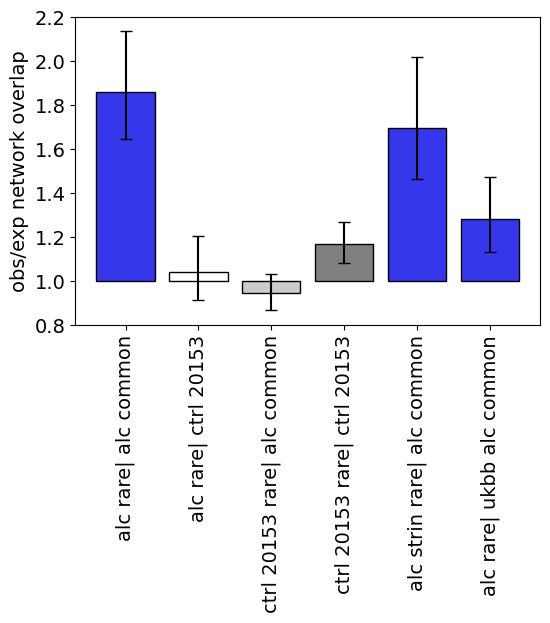

In [80]:
color3="#3636eb"
grey='#CCCCCC'
plt.figure(figsize=(6,4))

plt.bar(x = labels,
       bottom= 1, height = tbl.obs_exp-1, capsize=4, edgecolor="black",
        yerr = [tbl.yerr_lower, tbl.yerr_upper],
        color =[color3]+['white',grey,'grey',color3] )
plt.xticks(rotation = 90)
plt.ylim([.8,2.2])

plt.ylabel('obs/exp network overlap')
plt.savefig('figures/barplot_'+'pcnet20'+'_small.svg',bbox_inches='tight')

#plt.savefig('figures/barplot_'+rare[i]+'_'+s2g[j]+'_andAnnovar'+'_small.png',dpi=500,bbox_inches='tight')
#plt.savefig('figures/barplot_'+'supplement'+'_small.png',dpi=500,bbox_inches='tight')
#plt.savefig('figures/barplot_'+'supplement'+s2g[j]+'_small.svg',bbox_inches='tight')

In [170]:
tiss_col_dict={'NS':"#CCCCCC", 'neuro':'#785EF0', 'cardiac':'#DC267F', 'epidermal':'#648FFF', 'gastro':'#FFB000', 'other':'#FE6100', 'urinary':'#FFDF58'}

In [41]:
tbl[1:5]

,rare variant dataset (code: description),common variant dataset (code: description),combined cutoff (z-score),individal cutoff (z-score),size observed overlap,size expected overlap,expected overlap error (stdev),p-value overlap,observed/expected network size,lower error,upper error,label
1,alcohol intake custom alcohol intake,UKB 20153 irnt Forced expiratory volume in 1-s...,3,1.5,145,157.48,11.755407,0.855800,0.920752,0.117519,0.157801,alc rare| ctrl 20153
2,alcohol intake custom alcohol intake,UKB 4104 Heel quantitative ultrasound index (QUI),3,1.5,140,158.85,11.967769,0.942379,0.881335,0.113398,0.152691,alc rare| ctrl 4104
3,100016 potassium intake,GSCAN EUR drinks per week,3,1.5,134,125.20,9.364828,0.173689,1.070288,0.136848,0.183866,ctrl 100016 rare| alc common
4,20016 fluid intelligence score,GSCAN EUR drinks per week,3,1.5,154,145.42,11.342998,0.224701,1.059002,0.140434,0.191123,ctrl 20016 rare| alc common


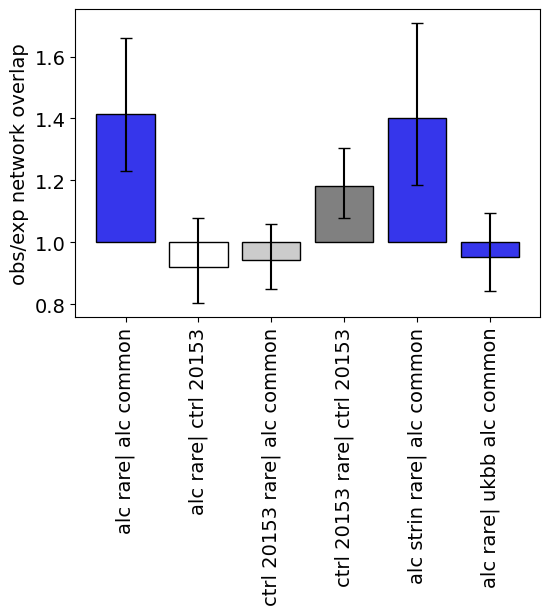

In [45]:
#tbl=coloc_scores[]
color3="#3636eb"
grey='#CCCCCC'
plt.figure(figsize=(3,4))

plt.bar(x = tbl.label,
       bottom= 1, height = tbl['observed/expected network size']-1, capsize=4, edgecolor="black",
        yerr = [tbl['lower error'], tbl['upper error']],
        color =[color3]+['white',grey,'grey'])
plt.xticks(rotation = 90)
plt.ylabel('obs/exp network overlap')
plt.savefig('figures/barplot_'+'main_fig_ukbb_incl'+'_small.svg',bbox_inches='tight')
#plt.savefig('figures/barplot_'+'main_fig'+'_small.svg',bbox_inches='tight')

In [70]:
tbl=coloc_scores
tbl

,z_comb,z_12,observed_overlap,expected_overlap_mean,expected_overlap_std,empirical_p,obs_exp,filename,include,include_small,label,corrected_pval,yerr_lower,yerr_upper
3,3,1.5,311,167.30,11.102702,1.290000e-38,1.858936,colocScore_alcoholintake_FDR_25_GSCAN_DPW_magm...,include,1.0,alcoholintake_GSCAN_DPW,4.520000e-37,0.213967,0.277953
11,3,1.5,187,179.88,12.608156,2.861342e-01,1.039582,colocScore_alcoholintake_FDR_25_neale_20153_ir...,include,2.0,alcoholintake_20153,1.000000e+01,0.125568,0.165563
43,3,1.5,201,156.87,10.474402,1.260000e-05,1.281316,colocScore_alcoholintake_FDR_25_ukbb_alcoholin...,include,6.0,alcoholintake_ukbb_alcoholintake,4.410000e-04,0.148282,0.192938
243,3,1.5,308,325.68,14.258247,8.925094e-01,0.945714,colocScore_rare_neale_20153_irnt_FDR_25_GSCAN_...,include,3.0,rare_20153_GSCAN_DPW,3.120000e+01,0.074737,0.088767
251,3,1.5,407,348.52,14.182722,1.870000e-05,1.167795,colocScore_rare_neale_20153_irnt_FDR_25_neale_...,include,4.0,rare_20153_20153,6.550000e-04,0.086264,0.101217
675,3,1.5,255,150.33,12.262182,6.950000e-18,1.696268,colocScore_rare_strin_allcut_alcoholintake_GSC...,include,5.0,rare_strin_allcut_alcoholintake_GSCAN_DPW,2.430000e-16,0.233809,0.322796


In [71]:
#tbl=coloc_scores.sort_values(by='obs_exp', ascending=False)
plt.figure(figsize=(6,4))
color3="#3636eb"
grey='#CCCCCC'
plt.bar(x = tbl.label,
       bottom= 1, height = tbl['observed/expected network size']-1, capsize=4, edgecolor="black",
        yerr = [tbl['lower error'], tbl['upper error']],
        color =[color3]+['white',grey,'grey',color3])
plt.xticks(rotation = 90)
plt.ylim([.8,2.2])
plt.ylabel('obs/exp network overlap')
#plt.savefig('figures/barplot_'+'main_fig_ukbb_incl'+'_small.svg',bbox_inches='tight')
#plt.savefig('figures/barplot_'+rare[i]+'_'+s2g[j]+'_andAnnovar'+'_small.png',dpi=500,bbox_inches='tight')
#plt.savefig('figures/barplot_'+'pcnet20'+'_small.svg',bbox_inches='tight')
#plt.savefig('figures/barplot_'+'supplement'+s2g[j]+'_small.svg',bbox_inches='tight')

KeyError: 'observed/expected network size'

<Figure size 600x400 with 0 Axes>

In [64]:
labels=tbl.label

In [65]:
labels

0            alc rare| alc common
1            alc rare| ctrl 20153
5     ctrl 20153 rare| alc common
6     ctrl 20153 rare| ctrl 20153
11     alc strin rare| alc common
12      alc rare| ukbb alc common
Name: label, dtype: object